### 목표
- 1. Folium을 활용한 map visualization
- 2. 서울시 범죄 데이터 2000년 ~ 2017년도 종합하여 시각화 표출

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
from matplotlib import font_manager
from matplotlib import rc

f_path = "C://Windows/Fonts/malgun.ttf"
f_name = font_manager.FontProperties(fname=f_path).get_name()

rc('font', family=f_name)

In [8]:
import folium

In [11]:
m = folium.Map(location=[45.5236, -122.6750])
# m = folium.Map(location=[37.2410, 126.5543]) # 우리집 근처
m

In [12]:
m.save('./folium_map_save.html')

In [14]:
folium.Map(location=[22.20111, 113.54417], tiles='Stamen Toner', zoom_start=13)

In [15]:
folium.Map(location=[22.20111, 113.54417], tiles='CartoDB dark_matter', zoom_start=13)

In [16]:
folium.Map(location=[22.20111, 113.54417], tiles='Stamen Toner', zoom_start=13)

In [17]:
folium.Map(location=[22.20111, 113.54417], tiles='Stamen Watercolor', zoom_start=13)

In [19]:
my_map = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')

folium.Marker([45.3288, -121.6625], popup='<i>Mt. hood Meadows</i>').add_to(my_map)
folium.Marker([45.3311, -121.7113], popup='<b>Timberline Lodge</b>').add_to(my_map)

my_map

In [22]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles='Stamen Terrain')

folium.Marker([45.3288, -121.6625], popup='Mt. hood Meadows', icon=folium.Icon(icon='cloud')).add_to(m)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge', icon=folium.Icon(color='green')).add_to(m)
folium.Marker([45.3300, -121.6823], popup='안녕', icon=folium.Icon(color='red', icon='info-sign')).add_to(m)

m

In [23]:
m = folium.Map(location=[45.5236, -122.6750], zoom_start=13, tiles='Stamen Terrain')

folium.CircleMarker(location=[45.5215, -122.6261], radius=50, popup='Laurelhurst Park', color='#3186cc',
                   fill=True, fill_color='#3186cc').add_to(m)

m

In [7]:
import pandas as pd

state_data = pd.read_csv('datas/03_US_Unemployment_Oct2012.csv')
state_data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [9]:
import json

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data='datas/03_us-states.json',
    data=state_data, columns=['State', 'Unemployment'],
    nan_fill_color='purplr', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='YlGn',
    legend_name='Unemployment Rate (%)'
).add_to(m)
m

### 

In [24]:
import folium
import json

crime_gu = pd.read_csv('datas/seoul_crime/seoul_crime_result.csv', encoding='utf-8')
geo_path='datas/03_skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path, encoding='utf-8'))

crime_gu.head()

,구,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
0,강남구,607,20,7,3130,3956,81.713344,100.000000,100.0,44.185304,86.223458
1,강동구,172,10,5,1645,2429,98.255814,100.000000,100.0,57.689970,86.825854
2,강북구,208,7,8,1014,2156,73.557692,71.428571,100.0,62.623274,93.831169
3,강서구,316,4,11,1888,2916,80.063291,100.000000,100.0,58.951271,87.242798
4,관악구,379,7,8,1979,3152,85.224274,85.714286,87.5,58.211218,84.581218


In [26]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구', '살인'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
    legend_name='살인 발생 건수'
).add_to(my_map)

my_map

In [27]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구', '강간'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
    legend_name='강간 발생 건수'
).add_to(my_map)

my_map

In [28]:
my_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

folium.Choropleth(
    geo_data=geo_str,
    data=crime_gu, columns=['구', '폭력'],
    nan_fill_color='purple', nan_fill_opacity=0.4,
    key_on='feature.id', fill_color='PuRd',
    legend_name='폭력 발생 건수'
).add_to(my_map)

my_map

### 연도별 범죄 데이터 정리

In [29]:
import numpy as np

crime_raw_data = pd.read_csv('datas/seoul_crime/2000년.csv', usecols=[0,1,2,3], encoding='euc-kr')
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,17
3,중부,강도,검거,15
4,중부,강간,발생,14


In [30]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=[np.sum]
)

crime_station.columns = crime_station.columns.droplevel([0,1,2])
crime_station.head()

발생검거,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생
구분,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892
강동,58,62,40,49,11,12,671,1838,4333,4716
강북,48,47,48,47,8,9,458,859,3446,3624
강서,64,75,55,75,7,6,509,1559,3988,4361
관악,44,59,36,56,7,8,349,1764,2658,2921


In [31]:
crime_station.columns=['강간', '1', '강도', '2', '살인', '3', '절도', '4' , '폭력', '5']
crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]

crime_station.head()

,강간,강도,살인,절도,폭력
구분,,,,,
강남,70,72,4,523,4345
강동,58,40,11,671,4333
강북,48,48,8,458,3446
강서,64,55,7,509,3988
관악,44,36,7,349,2658


In [32]:
crime_station['year'] = 2000
crime_station.head()

,강간,강도,살인,절도,폭력,year
구분,,,,,,
강남,70,72,4,523,4345,2000
강동,58,40,11,671,4333,2000
강북,48,48,8,458,3446,2000
강서,64,55,7,509,3988,2000
관악,44,36,7,349,2658,2000


### 18년개 연도가 있기 때문에 파일들을 전부 읽고 처리하자 

In [33]:
from glob import glob

glob('datas/seoul_crime/*')

['datas/seoul_crime\\2000년.csv',
 'datas/seoul_crime\\2001년.csv',
 'datas/seoul_crime\\2002년.csv',
 'datas/seoul_crime\\2003년.csv',
 'datas/seoul_crime\\2004년.csv',
 'datas/seoul_crime\\2005년.csv',
 'datas/seoul_crime\\2006년.csv',
 'datas/seoul_crime\\2007년.csv',
 'datas/seoul_crime\\2008년.csv',
 'datas/seoul_crime\\2009년.csv',
 'datas/seoul_crime\\2010년.csv',
 'datas/seoul_crime\\2011년.csv',
 'datas/seoul_crime\\2012년.csv',
 'datas/seoul_crime\\2013년.csv',
 'datas/seoul_crime\\2014년.csv',
 'datas/seoul_crime\\2015년.csv',
 'datas/seoul_crime\\2016년.csv',
 'datas/seoul_crime\\2017년.csv',
 'datas/seoul_crime\\seoul_crime_result.csv']

In [34]:
file_list = glob('datas/seoul_crime/20*')
file_list

['datas/seoul_crime\\2000년.csv',
 'datas/seoul_crime\\2001년.csv',
 'datas/seoul_crime\\2002년.csv',
 'datas/seoul_crime\\2003년.csv',
 'datas/seoul_crime\\2004년.csv',
 'datas/seoul_crime\\2005년.csv',
 'datas/seoul_crime\\2006년.csv',
 'datas/seoul_crime\\2007년.csv',
 'datas/seoul_crime\\2008년.csv',
 'datas/seoul_crime\\2009년.csv',
 'datas/seoul_crime\\2010년.csv',
 'datas/seoul_crime\\2011년.csv',
 'datas/seoul_crime\\2012년.csv',
 'datas/seoul_crime\\2013년.csv',
 'datas/seoul_crime\\2014년.csv',
 'datas/seoul_crime\\2015년.csv',
 'datas/seoul_crime\\2016년.csv',
 'datas/seoul_crime\\2017년.csv']

In [35]:
for each_file in file_list:
    print(each_file)

datas/seoul_crime\2000년.csv
datas/seoul_crime\2001년.csv
datas/seoul_crime\2002년.csv
datas/seoul_crime\2003년.csv
datas/seoul_crime\2004년.csv
datas/seoul_crime\2005년.csv
datas/seoul_crime\2006년.csv
datas/seoul_crime\2007년.csv
datas/seoul_crime\2008년.csv
datas/seoul_crime\2009년.csv
datas/seoul_crime\2010년.csv
datas/seoul_crime\2011년.csv
datas/seoul_crime\2012년.csv
datas/seoul_crime\2013년.csv
datas/seoul_crime\2014년.csv
datas/seoul_crime\2015년.csv
datas/seoul_crime\2016년.csv
datas/seoul_crime\2017년.csv


In [44]:
for each_file in file_list:
    print(each_file.split('\\')[1][:4])

2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


In [48]:
crime_station_t = []

for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding='euc-kr')
    crime_station = crime_raw_data.pivot_table(
        crime_raw_data, index=['구분'], columns=['죄종', '발생검거'], aggfunc=[np.sum]
    )

    crime_station.columns = crime_station.columns.droplevel([0,1,2])
    crime_station.columns=['강간', '1', '강도', '2', '살인', '3', '절도', '4' , '폭력', '5']
    crime_station = crime_station[['강간', '강도', '살인', '절도', '폭력']]
    crime_station['year'] = each_file.split('\\')[1][:4]
    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)


In [49]:
crime_total = pd.concat(crime_station_t)
crime_total.head()

,구분,강간,강도,살인,절도,폭력,year
0,강남,70.0,72.0,4.0,523.0,4345.0,2000
1,강동,58.0,40.0,11.0,671.0,4333.0,2000
2,강북,48.0,48.0,8.0,458.0,3446.0,2000
3,강서,64.0,55.0,7.0,509.0,3988.0,2000
4,관악,44.0,36.0,7.0,349.0,2658.0,2000


In [50]:
crime_total_murder = crime_total.pivot('year', '구분', '살인')
crime_total_murder

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,4.0,11.0,8.0,7.0,7.0,5.0,10.0,9.0,3.0,3.0,...,3.0,6.0,7.0,4.0,1.0,4.0,8.0,12.0,1.0,3.0
2001,18.0,11.0,4.0,18.0,2.0,18.0,5.0,16.0,6.0,9.0,...,5.0,8.0,9.0,3.0,7.0,3.0,12.0,17.0,0.0,4.0
2002,6.0,6.0,7.0,10.0,8.0,15.0,7.0,22.0,3.0,6.0,...,8.0,7.0,2.0,3.0,3.0,1.0,5.0,8.0,2.0,4.0
2003,10.0,6.0,8.0,5.0,3.0,8.0,6.0,14.0,2.0,4.0,...,4.0,7.0,9.0,12.0,6.0,3.0,4.0,13.0,0.0,6.0
2004,6.0,7.0,15.0,7.0,0.0,10.0,13.0,14.0,2.0,5.0,...,5.0,6.0,3.0,8.0,5.0,0.0,6.0,6.0,2.0,6.0
2005,10.0,6.0,9.0,8.0,4.0,16.0,11.0,14.0,1.0,11.0,...,5.0,10.0,3.0,9.0,6.0,3.0,5.0,15.0,3.0,2.0
2006,6.0,3.0,7.0,15.0,4.0,7.0,13.0,6.0,2.0,7.0,...,5.0,6.0,10.0,8.0,3.0,7.0,4.0,13.0,4.0,6.0
2007,4.0,9.0,12.0,3.0,10.0,8.0,19.0,6.0,1.0,10.0,...,3.0,8.0,12.0,7.0,6.0,4.0,9.0,14.0,4.0,2.0
2008,3.0,8.0,8.0,17.0,9.0,5.0,23.0,3.0,1.0,4.0,...,5.0,12.0,18.0,6.0,6.0,6.0,6.0,7.0,4.0,3.0


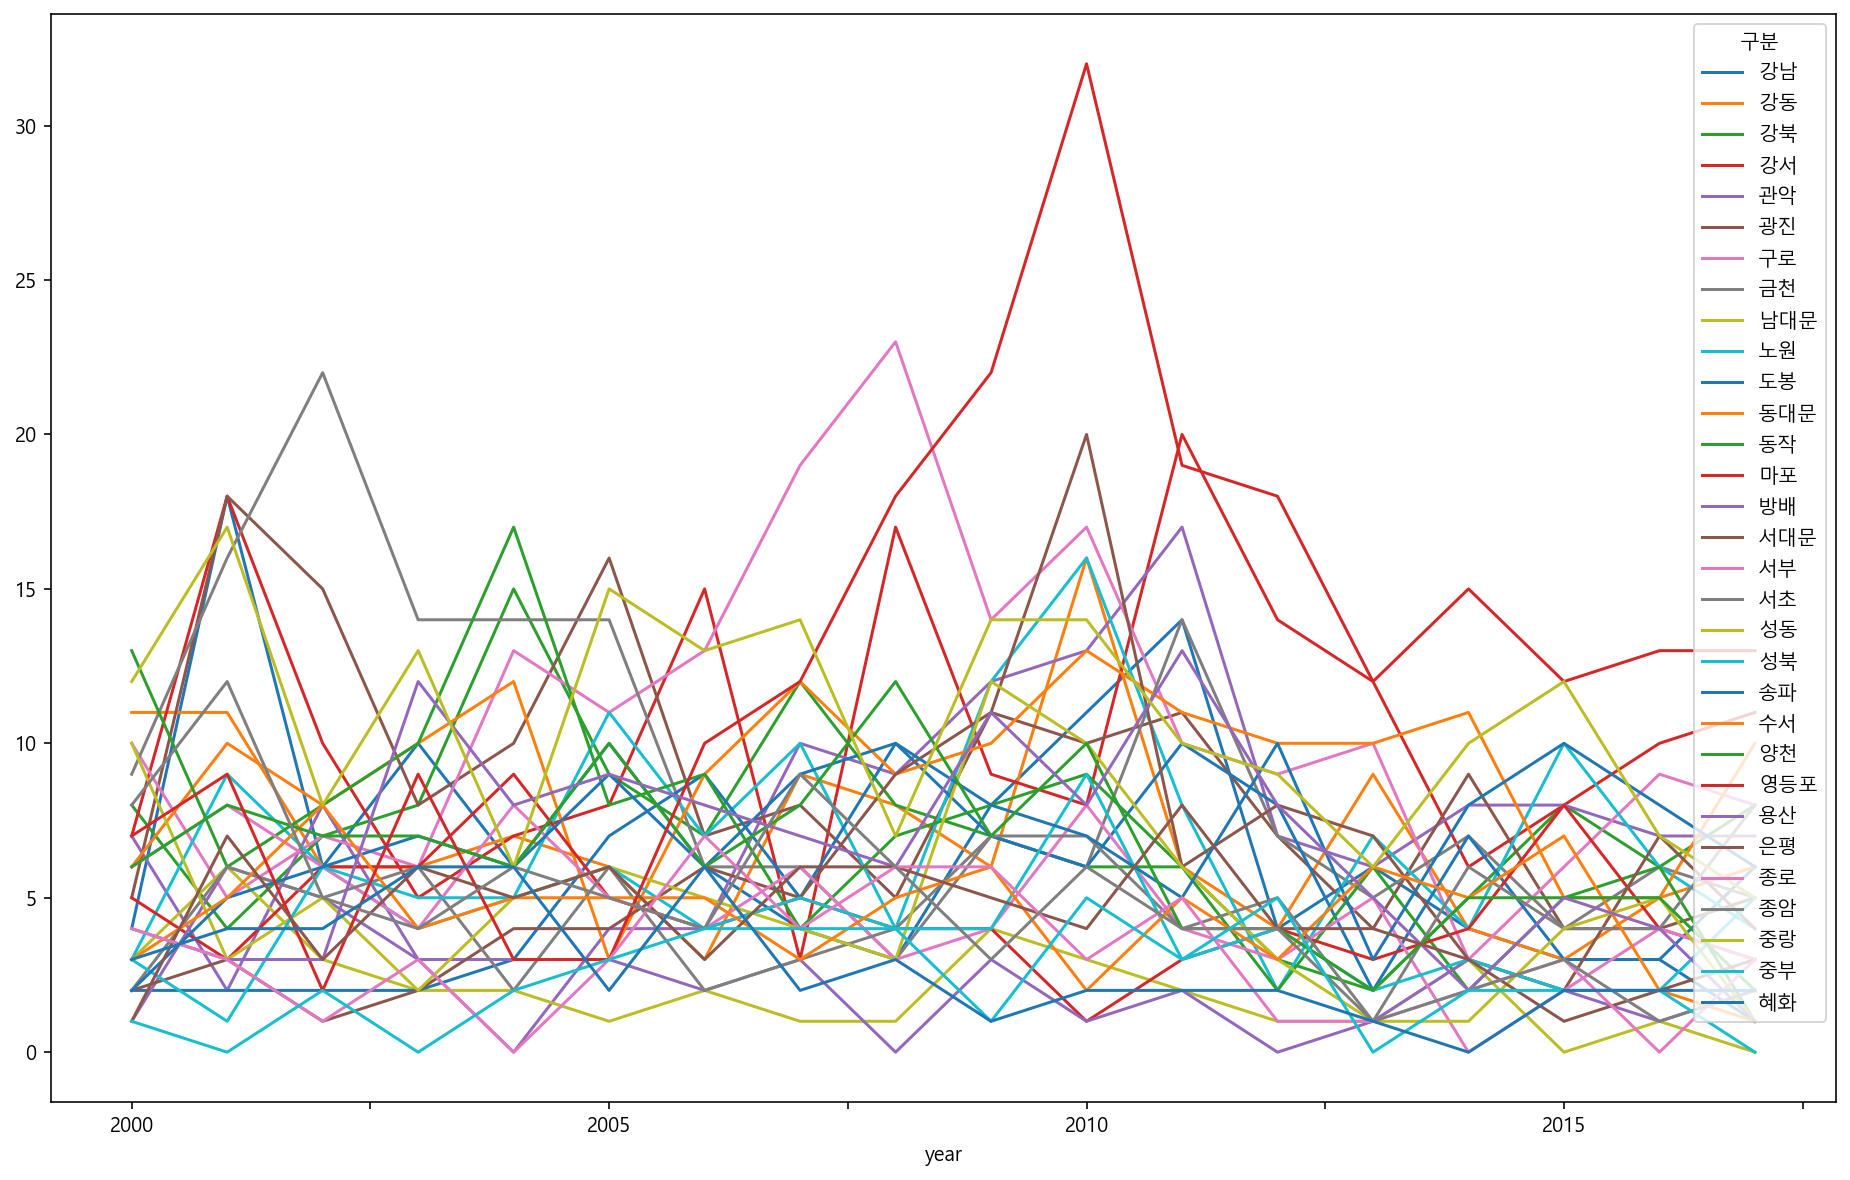

In [51]:
crime_total_murder.plot(figsize=(16,10))
plt.show()

<AxesSubplot:xlabel='year'>

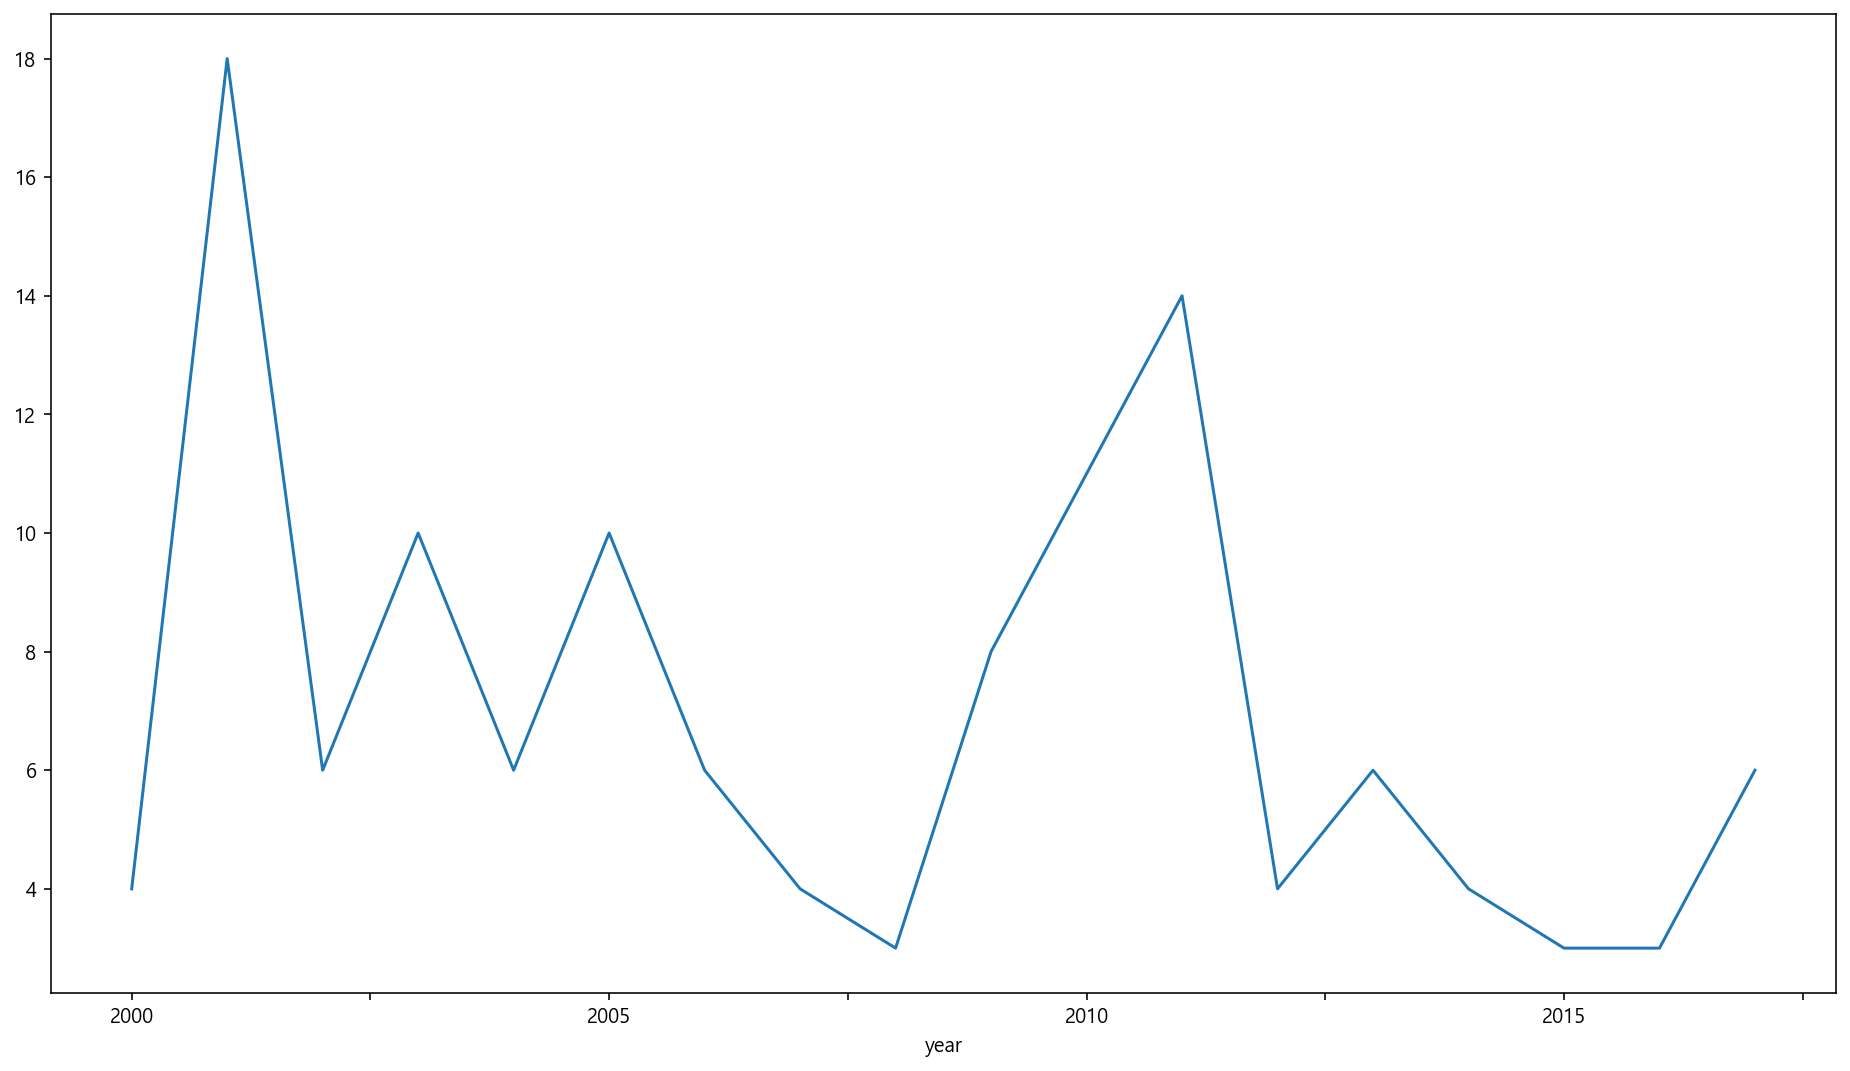

In [54]:
crime_total_murder['강남'].plot(figsize=(16,9))

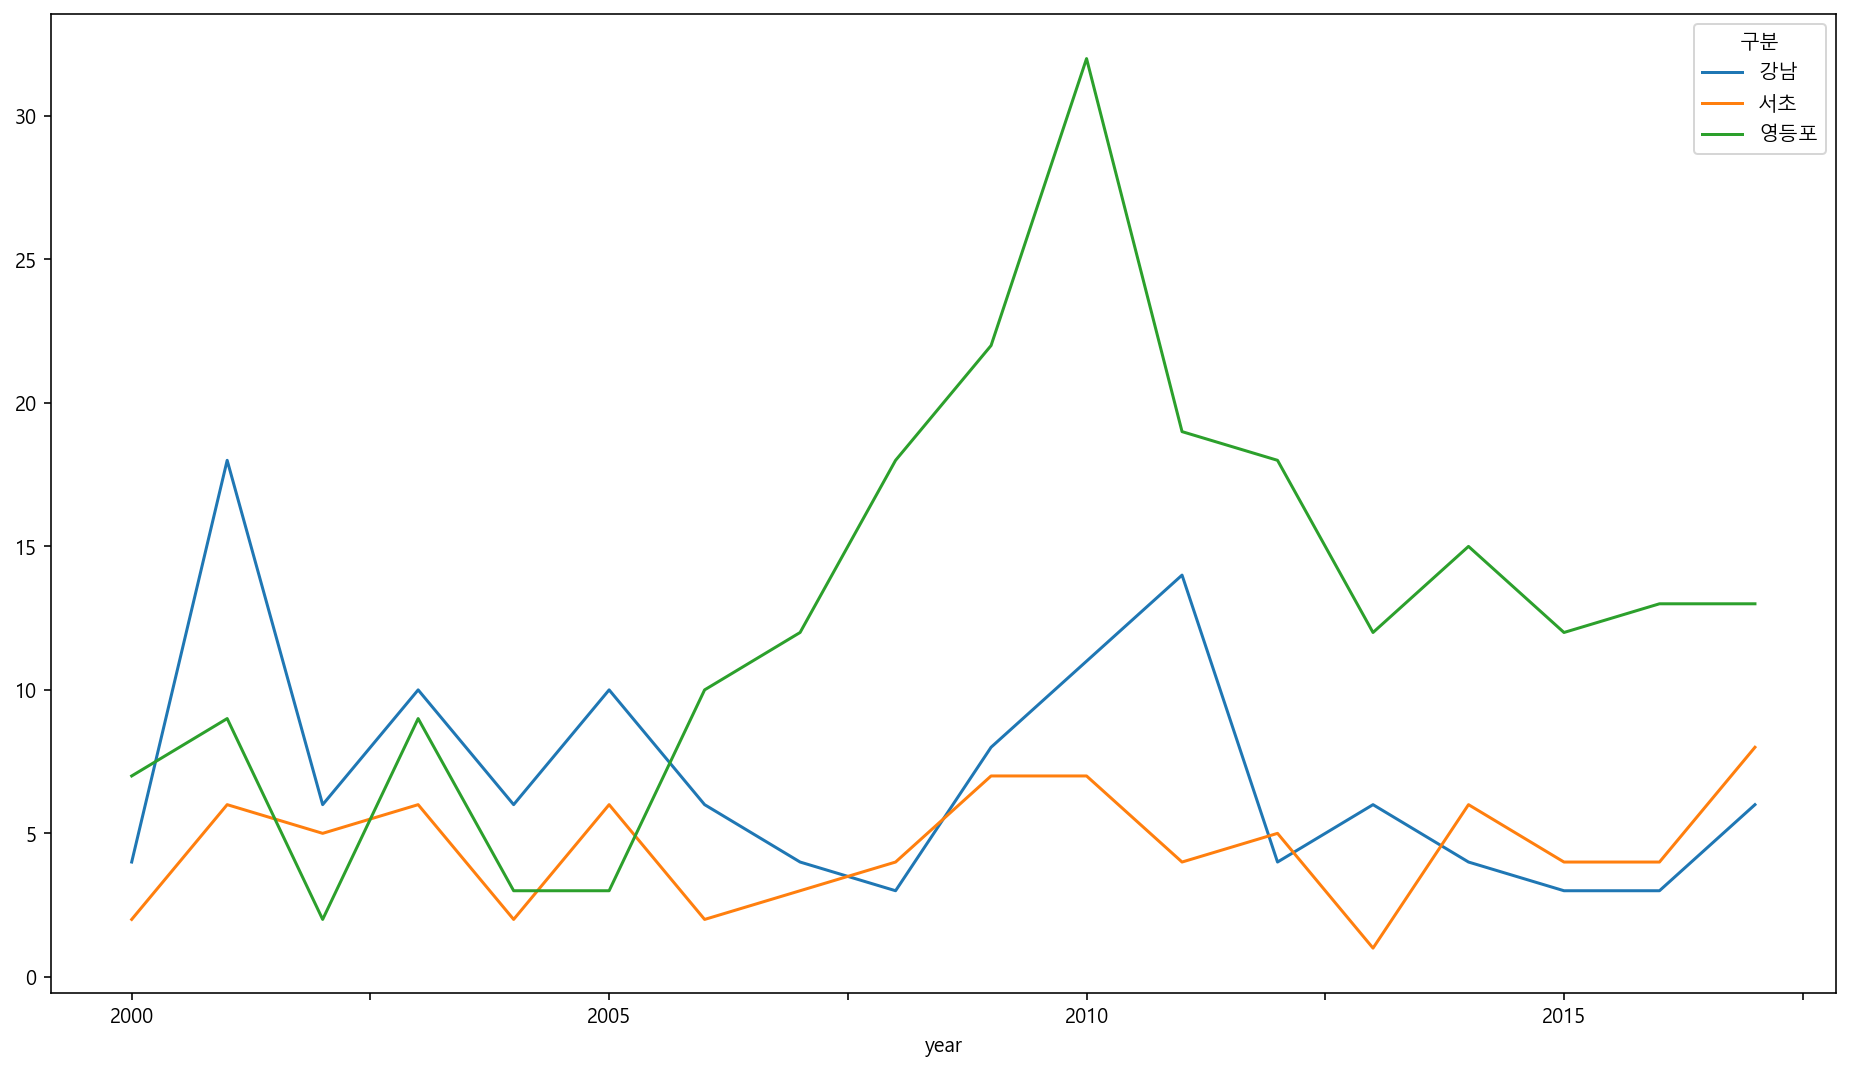

In [56]:
crime_total_murder[['강남', '서초', '영등포']].plot(figsize=(16,9))
plt.show()

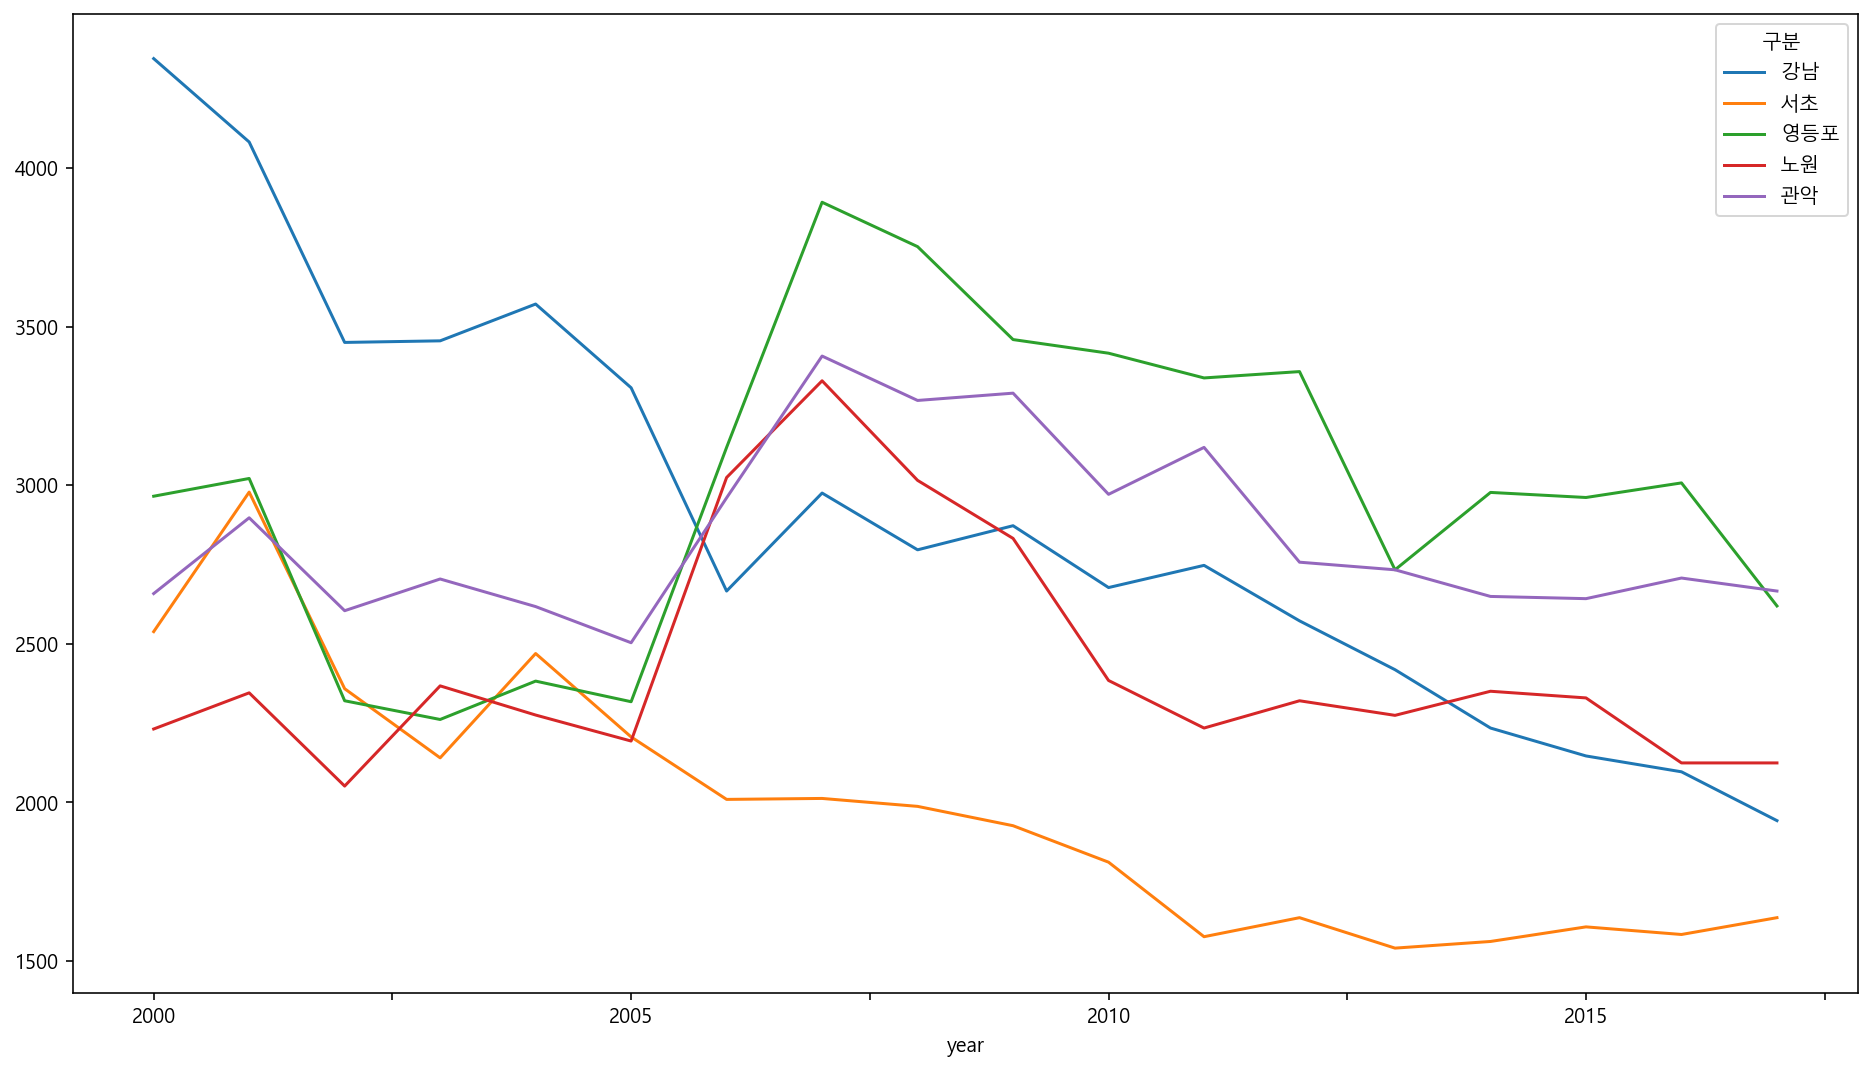

In [57]:
crime_total_violence = crime_total.pivot('year', '구분', '폭력')
crime_total_violence[['강남', '서초', '영등포', '노원', '관악']].plot(figsize=(16,9))
plt.show()

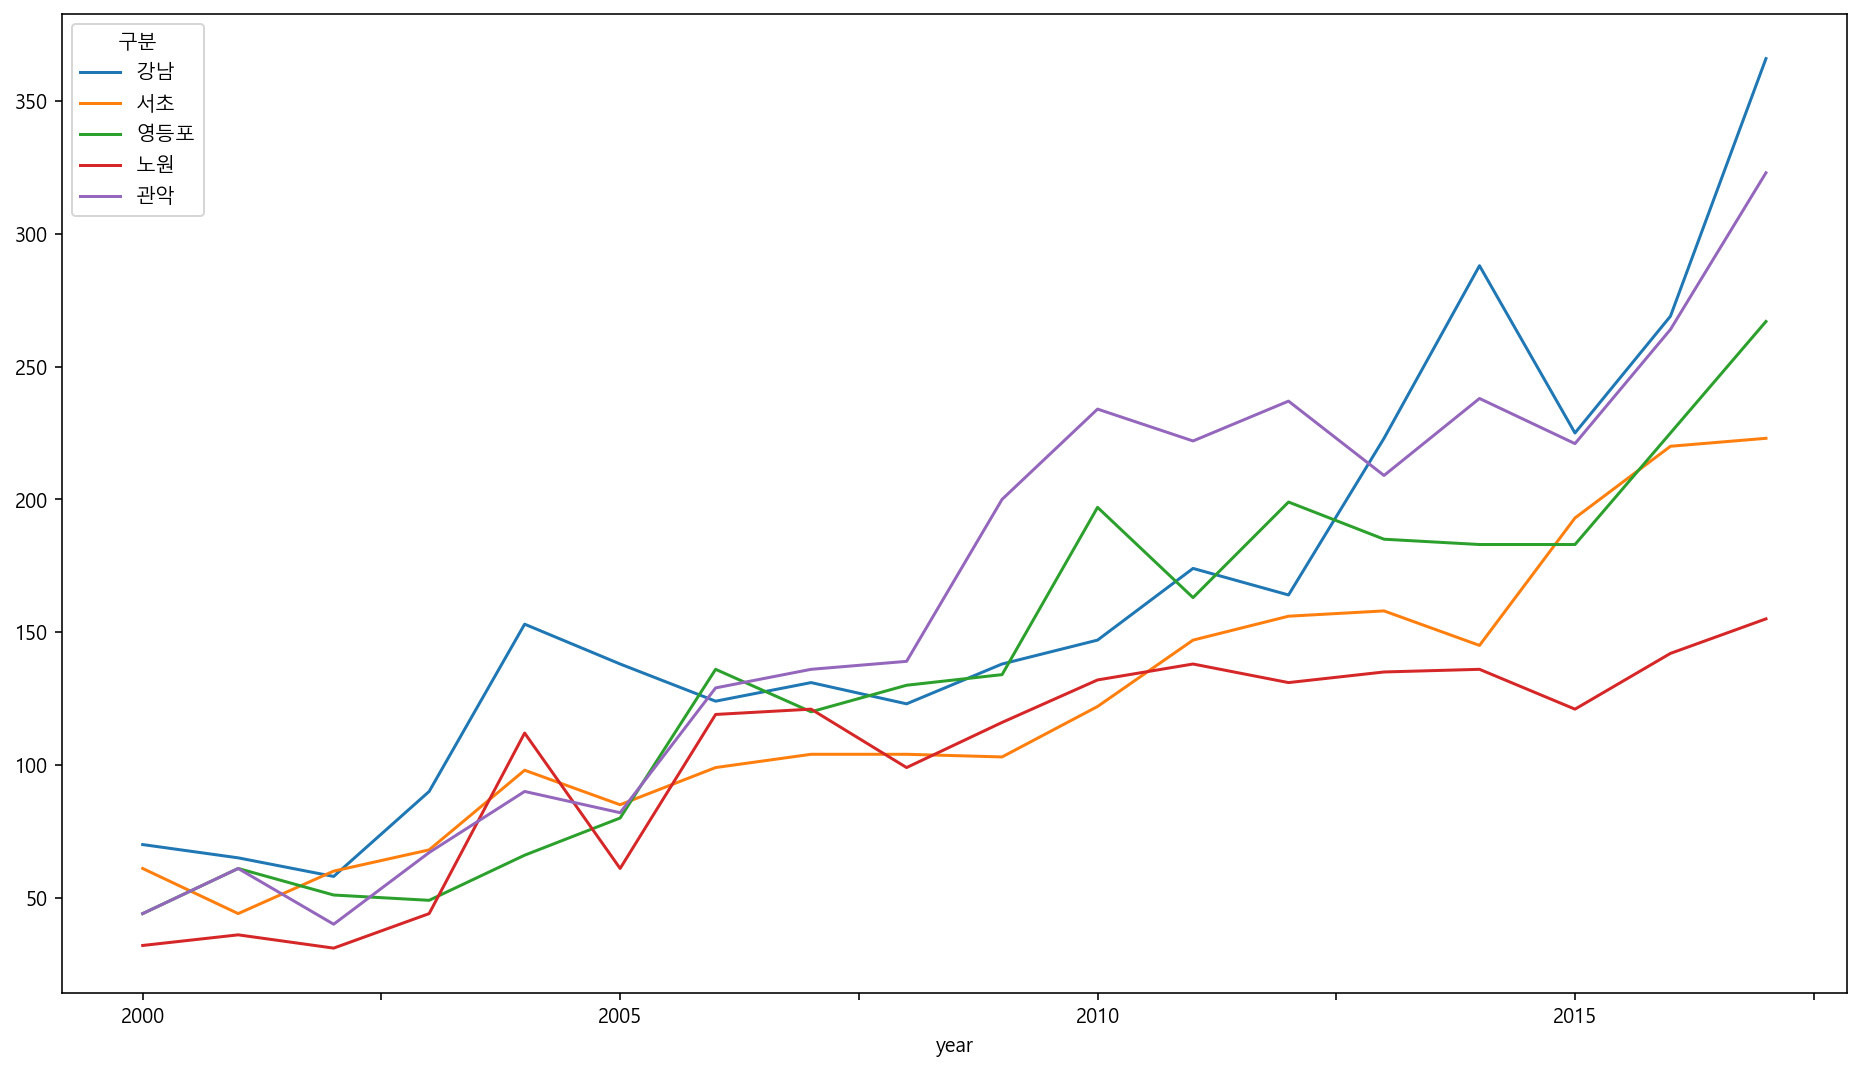

In [58]:
crime_total_sexual = crime_total.pivot('year', '구분', '강간')
crime_total_sexual[['강남', '서초', '영등포', '노원', '관악']].plot(figsize=(16,9))
plt.show()